# Financial Inclusion in East Africa

This project was undertaken with the goal of finding out individuals with access to bank accounts and the different factors that influence them. This project could be used by government, financial institutions and Community enabler organizations(NGOs) to plan and roll out initiatives that would ultimately favour individuals gain access to banking institutions promoting a saving culture across East Africa. 

## Business Understanding
A ficticious 

## Data Understanding
The data used from in this project was obtained from Zindi Africa platform (https://zindi.africa/competitions/financial-inclusion-in-africa/data). There are two datasets provided, train.csv and test.csv.
1. **Train.csv**

The dataset contains 13 columns with 23524 entries. Each row is an entry pertaining an individual. Below there are brief descriptions of the different columns.
 - ***country*** : This column contains the name of country locations where the individuals are located.
 - ***year*** : This column contains the year the entry was recorded.
 - ***uniqueid*** : This column is a unique identifier to each record in the dataset.
 - ***bank_account*** : This is the target column with entries showing whether one has a bank account or not.
 - ***location_type*** : This column contains the type of location an individual is ie. urban, rural etc.
 - ***cellphone_access*** : This column contains information wether an individual has access to a cellphone or not.
 - ***household_size*** : This column contains information about the size of the household of an individual.
 - ***age_of_respondent*** :The column contains information about the age of the individual.
 - ***gender_of_respondent*** : This column contains the biological gender identification of the individual.
 - ***relationship_with_head*** : This column contains information about the nature of relationship with the head of the household to an individual.
 - ***marital_status*** : This column contains information about the marital status of the individual.
 - ***education_level*** : This column contains information about the educational level of the individual.

2. **Test.csv**

The columns are similar as those of the train set with the exception of the bank_account column which is missing.

![Financial Inclusion](images/financial_inclusion.jpg)

In [1]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# imblearn
import imblearn
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

# sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
# sklearn models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# sklearn ensemble
from sklearn.ensemble import RandomForestClassifier
# sklearn metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
# xgboost
import xgboost as xgb
# warnings
import warnings
warnings.filterwarnings('ignore')
# pickle
import pickle

/home/abbo/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data = pd.read_csv("data/train.csv")
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [109]:
# test dataset
test = pd.read_csv('data/test.csv')

In [92]:
test.columns

Index(['country', 'location_type', 'cellphone_access', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'household_size_binned', 'bank_account'],
      dtype='object')

In [5]:
data.shape

(23524, 13)

In [6]:
# Checking the column names
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [6]:
# Checking the overall information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


The dataframe contains 13 columns with 23524 entries. 3 columns are of numeric type while the rest are of object type. Below we check missing values in individual columns.

In [4]:
def completeness(df):
    """This column checks the percentage completeness of the different columns and
    returns the percentages as a dataframe"""
    # obtaining the columns & length of dataframe
    columns = list(df.columns)
    length_df = len(df)
    perc_completeness = []
    
    for column in columns:
        # finding missing values
        missing =  df[column].isna().sum()
        # percent missing
        perc_miss = (1 - (missing / length_df)) * 100
        perc_completeness.append(perc_miss)
    
    output = pd.DataFrame(list(zip(columns, perc_completeness)),
                          columns= ['Feature', '%_completeness'])
    # sort
    output = output.sort_values(by= '%_completeness', ascending= True)
    output.reset_index(inplace= True, drop= True)
    
    return output
    

In [8]:
completeness(data)

,Feature,%_completeness
0,country,100.0
1,year,100.0
2,uniqueid,100.0
3,bank_account,100.0
4,location_type,100.0
5,cellphone_access,100.0
6,household_size,100.0
7,age_of_respondent,100.0
8,gender_of_respondent,100.0
9,relationship_with_head,100.0


Most of the data in the dataframe is intanct. Different features will be checked to see if some of the missing values can be salvaged in the EDA phase. Checking the overall descriptive statistics of the numeric columns below:

In [9]:
# Checking the overall statistical description of the data set
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


## Exploratory Data Analysis

#### 1. Has a bank account

In [10]:
data['bank_account'].nunique()

2

In [11]:
data['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

This is a categorical column and also the target column.

#### 2. Gender of respondent

In [12]:
data['gender_of_respondent'].nunique()

2

These is a categorical column.

In [13]:
data['gender_of_respondent'].value_counts()

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

In [5]:
def perc_dist(df, column):
    """Function takes in a categorical column and returns 
    percentage distribution of the categories"""
    entries = len(df)
    val_list = list(df[column].unique())
    perc = []
    for val in val_list:
        observations = len(df[df[column] == val])
        ration = round((observations / entries) * 100, 2)
        perc.append(ration)
    # inserted the dataframe
    output = pd.DataFrame(list(zip(val_list, perc)), columns= ['features', 'percentage'])
    # sort
    output = output.sort_values(by= 'percentage', ascending= False)
    output.reset_index(inplace= True, drop= True)
    return output


In [6]:
# gender percentage of respondents
perc_dist(data, 'gender_of_respondent')

,features,percentage
0,Female,58.99
1,Male,41.01


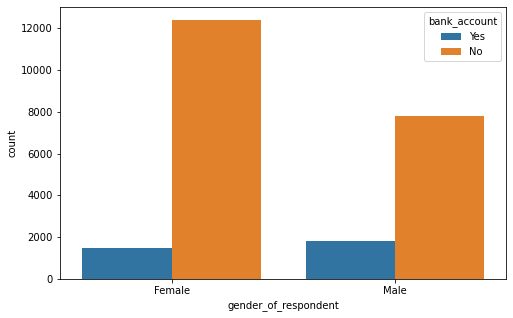

In [16]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.countplot(data= data, x= 'gender_of_respondent', hue= 'bank_account');

There is a significantly high number of women who have no bank accounts compared to men. The number of men and women with access to bank accounts is about the same, with men slighly being higher than women.
##### questions?
1. What percentage of men have access to bank accounts?
2. What percentage of women have access to bank accounts?
3. What is the reason for this observations/ratios?

#### 3. Marital status

In [17]:
data['marital_status'].nunique()

5

In [18]:
data['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [7]:
data.loc[data['marital_status'] == 'Dont know', 'marital_status'] = 'Single/Never Married'

In [8]:
perc_dist(data, 'marital_status')

,features,percentage
0,Married/Living together,45.69
1,Single/Never Married,33.97
2,Widowed,11.51
3,Divorced/Seperated,8.83


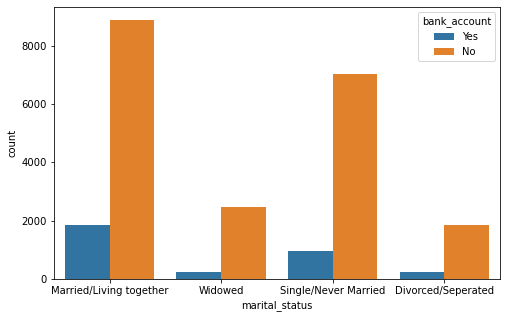

In [21]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.countplot(data= data, x= 'marital_status', hue= 'bank_account');

The number of Married/Living together individuals without access to bank accounts is the highest, seconded by Single/Never Married, with Widowed and Divorced/Separated individuals being being just about the same. Overall the number of people with access to bank accounts seem to be very low.
##### questions?
1. Why do we observe such low number of people with access to banks?
2. Why the high number of lack of access to banks in the Married/Living together? Can this be alleviated?
3. What is the relationship between access to bank account and marital status?

#### 4. Respondent age

In [22]:
data['age_of_respondent'].describe()

count    23524.000000
mean        38.805220
std         16.520569
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

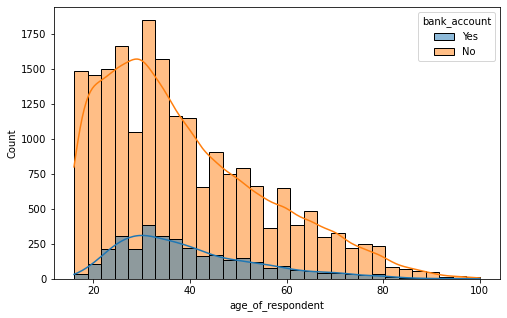

In [23]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.histplot(data= data, x= 'age_of_respondent', hue= 'bank_account', bins= 30, kde= True);

The distribution of the people is skewed towards the right. Missing values will be replaced with the median value. But first, checking for outliers is the step we take below:

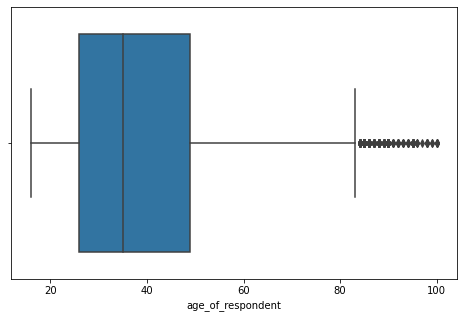

In [24]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.boxplot(data= data, x= 'age_of_respondent');

From the boxplot above, it appears that the age above 85 years could be outliers. Columns with values above 85 are dropped in below:

In [8]:
# checking number of values above 85
# exp = data[data['age_of_respondent'] > 85].copy()
# len(exp)

166

In [50]:
# data = data[data['age_of_respondent'] <= 85].copy()

#### 5. Type of Job

In [27]:
data['job_type'].nunique()

10

In [28]:
data['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

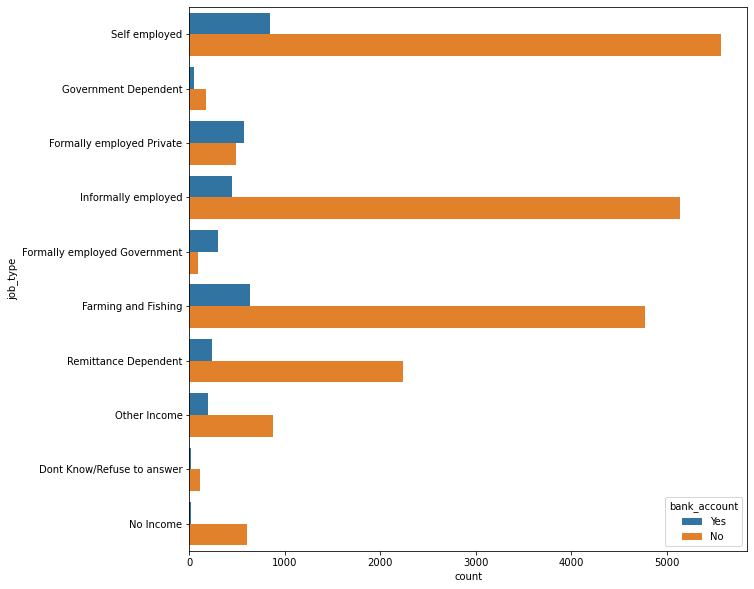

In [29]:
fig, ax = plt.subplots(figsize= (10, 10))
sns.countplot(data= data, y= 'job_type', hue= 'bank_account');

#### 6. Level of Education

In [30]:
data['education_level'].nunique()

6

In [31]:
data['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

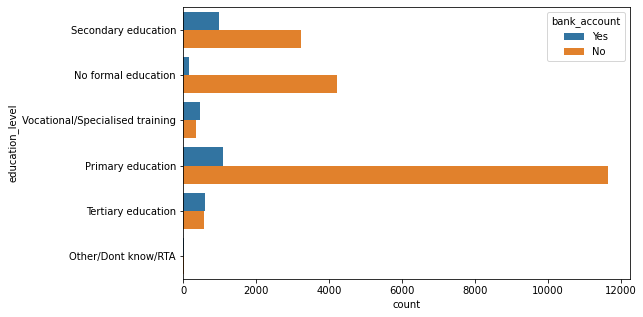

In [32]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.countplot(data= data, y= 'education_level', hue= 'bank_account');

In [9]:
# data = data[data['education_level'] != 'Other/Dont know/RTA'].copy()
data.loc[data['education_level'] == 'Other/Dont know/RTA', 'education_level'] = 'No formal education'

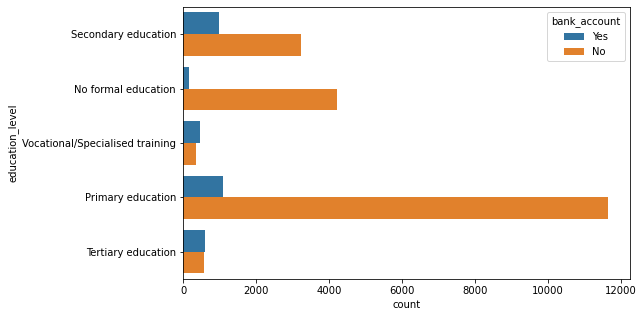

In [11]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.countplot(data= data, y= 'education_level', hue= 'bank_account');

There is significantly high number of people with no access to bank accounts with primary level education. Vocational/Specialiased and Tertiary education shows a balanced number between those with access to bank accounts and those without.
##### questions?
1. Does a level of education have an effect on access to banks?

#### 7. Household size
This is a categorical column.

In [35]:
data['household_size'].nunique()

20

In [36]:
data['household_size'].unique()[:5]

array([3, 5, 8, 7, 1])

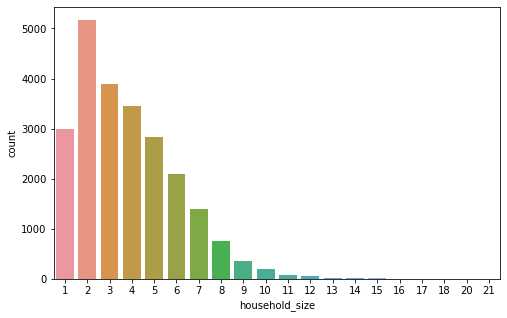

In [37]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.countplot(data= data, x= 'household_size');

Bining could help in the cardinality of the column. Null values will be filled with the median category first and then the zero values will be replaced with the modal class before bining.

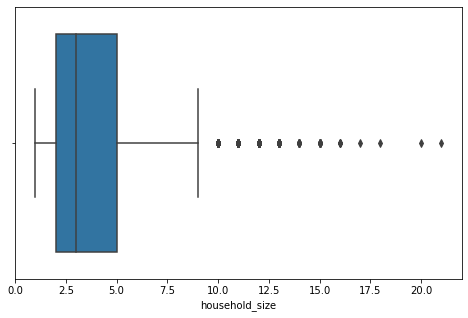

In [38]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.boxplot(data= data, x= 'household_size');

There are some outliers but since it is not a numerical continuous column, the best course of action should be bining.

In [10]:
def household(column):
    if column <= 3:
        return 'size 3 or below'
    elif 3 < column <= 6:
        return 'size btw 4 and 6'
    elif 6 < column <= 10:
        return 'size btw 7 and 10'
    else:
        return 'size above 10'
    

In [11]:
data['household_size_binned'] = data['household_size'].apply(household)

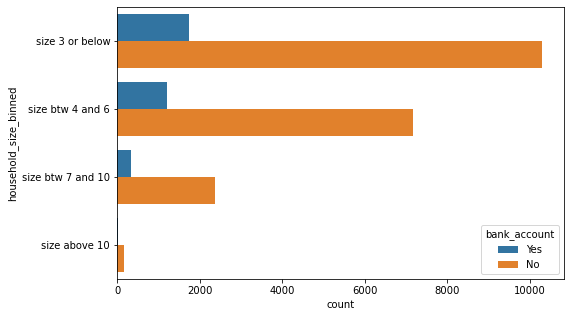

In [14]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.countplot(data= data, y= 'household_size_binned', hue= 'bank_account');

#### 8. Country

In [42]:
data['country'].nunique()

4

In [43]:
data['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [44]:
perc_dist(data, 'country')

,features,percentage
0,Rwanda,37.16
1,Tanzania,28.15
2,Kenya,25.73
3,Uganda,8.95


The minority class in the dataset is Uganda with about 9% of the data.

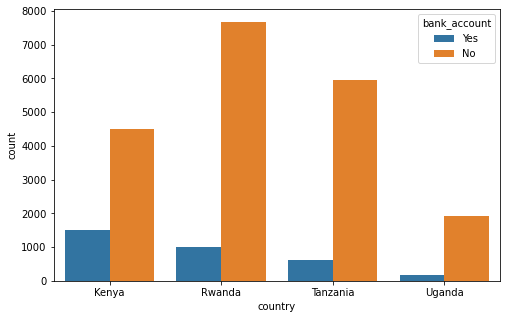

In [45]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.countplot(data= data, x= 'country', hue= 'bank_account');

Rwanda has the highest number of people with no access to bank accounts followed by Tanzania, with Uganda having the lowest number of individuals with no access to bank accounts. Kenya has the highest number of individuals with access to bank accounts. Uganda has the lowest number of individuals with access to banks.
##### questions?
1. What factors, if any, in the respective countries influence access to banks?

#### 9. Type of location

In [46]:
data['location_type'].nunique()

2

In [47]:
perc_dist(data, 'location_type')

,features,percentage
0,Rural,60.96
1,Urban,39.04


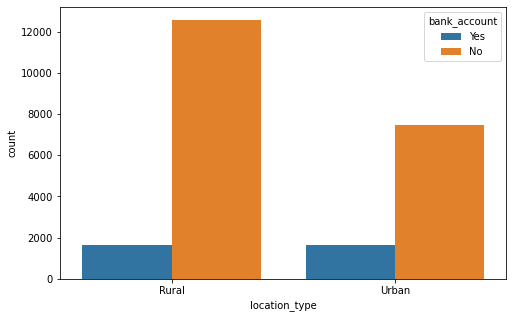

In [48]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.countplot(data= data, x= 'location_type', hue= 'bank_account');

High number of people with no access to bank accounts is no surprise in rural areas, however, the number of people with access to bank accounts is about the same between rural and urban residents.
##### questions?
1. Why the low number of people with access to bank account in urban areas?

#### 10. Relationship with the head

In [49]:
data['relationship_with_head'].nunique()

6

In [50]:
perc_dist(data, 'relationship_with_head')

,features,percentage
0,Head of Household,54.31
1,Spouse,27.88
2,Child,9.51
3,Parent,4.63
4,Other relative,2.85
5,Other non-relatives,0.81


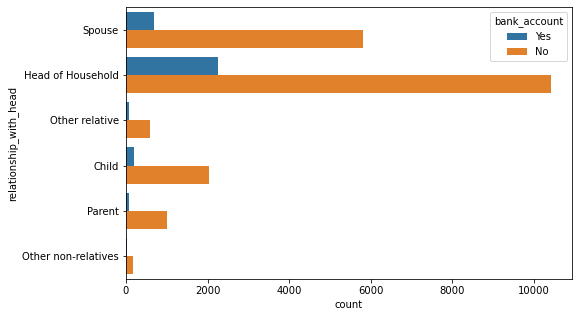

In [51]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.countplot(data= data, y= 'relationship_with_head', hue= 'bank_account');

Most people with no access to bank accounts are head of households.

#### 11. Cell phone access

In [52]:
data['cellphone_access'].nunique()

2

In [53]:
perc_dist(data, 'cellphone_access')

,features,percentage
0,Yes,74.54
1,No,25.46


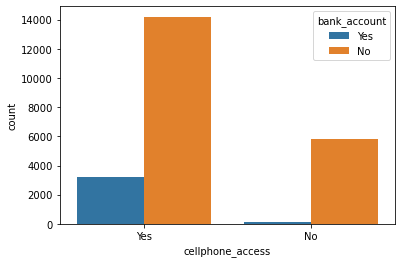

In [54]:
sns.countplot(data= data, x= 'cellphone_access', hue= 'bank_account');

People with cell phones have the highest number of people with no access to bank accounts. This is surprising given the advancement in technology.
##### questions?
1. Why do we have high number of people with cell phones without access to banks?

In [12]:
# dropping unneccessary columns
dropped = ['year', 'uniqueid', 'household_size']
data.drop(columns= dropped, inplace= True)

In [13]:
data.columns

Index(['country', 'bank_account', 'location_type', 'cellphone_access',
       'age_of_respondent', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type',
       'household_size_binned'],
      dtype='object')

### Test dataset

In [14]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [16]:
def test_clean(df):
    df['household_size_binned'] = df['household_size'].apply(household)
    df.loc[df['education_level'] == 'Other/Dont know/RTA', 'education_level'] = 'No formal education'
    df.loc[df['marital_status'] == 'Dont know', 'marital_status'] = 'Single/Never Married'
    df.drop(columns= dropped, inplace= True)
    return df

In [15]:
# making changes to test df
test.loc[test['education_level'] == 'Other/Dont know/RTA', 'education_level'] = 'No formal education'
test.loc[test['marital_status'] == 'Dont know', 'marital_status'] = 'Single/Never Married'

In [17]:
test_copy = test_clean(test)
test_copy.columns

Index(['country', 'location_type', 'cellphone_access', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'household_size_binned'],
      dtype='object')

In [18]:
# test_copy.to_csv('data/test_cleaned.csv', index= False)
# test_copy = pd.read_csv('data/test_cleaned.csv')
test_copy.shape

(10086, 10)

In [19]:
test_copy.head()

,country,location_type,cellphone_access,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_binned
0,Kenya,Urban,Yes,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,size 3 or below
1,Kenya,Urban,Yes,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,size btw 7 and 10
2,Kenya,Rural,No,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,size 3 or below
3,Kenya,Rural,No,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,size btw 4 and 6
4,Kenya,Urban,No,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,size 3 or below


In [20]:
# data.to_csv('data/train_cleaned.csv', index= False)
# data = pd.read_csv('data/train_cleaned.csv')
data.shape

(23524, 11)

## Preprocessing

Train and test set will be preprocessed, making use of OneHotEncode, LabelEncoder, scaling etc where necessary. A copy of the main train set will be made and be prepared for algrithms suited to work with numerical values rather than text values.

In [21]:
data_preprocessed = data.copy()

In [22]:
# instantiating encoders and scaler
le = LabelEncoder()
ohe = OneHotEncoder(sparse= False, handle_unknown= 'ignore')
scaler = MinMaxScaler()
# pca = PCA(n_components= 1)

In [23]:
data_preprocessed['bank_account'] = le.fit_transform(data_preprocessed['bank_account'])

In [24]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [25]:
y = data_preprocessed['bank_account']
X = data_preprocessed.drop('bank_account', axis= 1)

In [26]:
X.columns

Index(['country', 'location_type', 'cellphone_access', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'household_size_binned'],
      dtype='object')

In [27]:
categorical = ['country', 'location_type', 'cellphone_access', 
               'gender_of_respondent', 'relationship_with_head',
               'marital_status', 'education_level', 'job_type', 'household_size_binned']

In [28]:
def ohe_col(df, column):
    """This function takes a dataframe and categorical column name
    and returns the one hot encoded column"""
    column_vals = df[[column]]
    ohe = OneHotEncoder(sparse= False, handle_unknown= 'ignore')
    ohe.fit(column_vals)
    column_ohe = ohe.transform(column_vals)
    col_val_encoded = pd.DataFrame(column_ohe,
                                   columns= ohe.categories_[0],
                                   index= df.index)
    return col_val_encoded

In [29]:
def cat_list(df, cat):
    """This function takes in a dataframe and a list of categorical columns
    and returns the one hot encoded dataframe"""
    for c in cat:
        col_ohe = ohe_col(df, c)
        df = pd.concat([df, col_ohe], axis= 1)
        df.drop(c, axis= 1, inplace= True)
    return df

In [30]:
# Obtaining one hot encoded columns
X_ohe = cat_list(X, categorical)
X_ohe.shape

(23524, 40)

In [31]:
# splitting the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size= .50, random_state= 0)

In [32]:
print('X train shape is', X_train.shape)
print('X test shape is', X_test.shape)

X train shape is (11762, 40)
X test shape is (11762, 40)


In [33]:
# scaling the age_of_respondent column on train set
X_train_numeric = X_train[['age_of_respondent']].copy()
# fitting and transforming
scaler.fit(X_train_numeric)
X_train_num_scaled = scaler.transform(X_train_numeric)
#changing to dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled,
                                  index= X_train_numeric.index,
                                  columns= X_train_numeric.columns)
X_train_full = pd.concat([X_train.drop('age_of_respondent', axis= 1), X_train_num_scaled], axis= 1)

In [34]:
X_train_full.head()

,Kenya,Rwanda,Tanzania,Uganda,Rural,Urban,No,Yes,Female,Male,...,Informally employed,No Income,Other Income,Remittance Dependent,Self employed,size 3 or below,size above 10,size btw 4 and 6,size btw 7 and 10,age_of_respondent
4543,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000
19239,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.035714
931,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.011905
1390,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.119048
403,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.059524


### Split Test Set

In [35]:
# implementing same scale for test set
X_test_numeric = X_test[['age_of_respondent']].copy()
X_test_scaled = scaler.transform(X_test_numeric)
X_test_num_scaled = pd.DataFrame(X_test_scaled, index= X_test_numeric.index, columns= X_test_numeric.columns)
X_test_full = pd.concat([X_test.drop('age_of_respondent', axis= 1), X_test_num_scaled], axis= 1)

## Modeling

In this section, an attempt to come up with models best suited for numeric inputs. Focus will mainly be on two types of models, the Logistic Regression and the KNN models.

#### 1) Logistic Regression

In [36]:
# instantiating logistic regression sklearn
log_reg = LogisticRegression(fit_intercept= False, solver= 'liblinear')

In [37]:
# fitting on the train set
logreg_model = log_reg.fit(X_train_full, y_train)
logreg_model

LogisticRegression(fit_intercept=False, solver='liblinear')

In [38]:
# predicting
y_train_pred = log_reg.predict(X_train_full)
y_test_pred = log_reg.predict(X_test_full)

In [39]:
print('The Mean absolute error train', round(mean_absolute_error(y_train, y_train_pred), 4))
print('The Mean absolute error of test', round(mean_absolute_error(y_test, y_test_pred), 4))

The Mean absolute error train 0.1139
The Mean absolute error of test 0.1152


Train Metrics
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10156
           1       0.68      0.32      0.43      1606

    accuracy                           0.89     11762
   macro avg       0.79      0.65      0.68     11762
weighted avg       0.87      0.89      0.87     11762

----------------------------------------------------------------------------------------------------


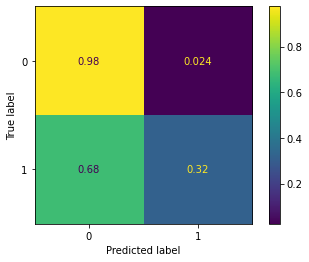

In [40]:
print('Train Metrics')
print(classification_report(y_train, y_train_pred))
print('-'*100)
plot_confusion_matrix(logreg_model, X_train_full, y_train, normalize= 'true');

Test Metrics
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     10056
           1       0.70      0.36      0.47      1706

    accuracy                           0.88     11762
   macro avg       0.80      0.67      0.70     11762
weighted avg       0.87      0.88      0.87     11762

----------------------------------------------------------------------------------------------------


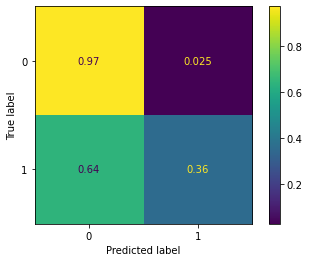

In [41]:
print('Test Metrics')
print(classification_report(y_test, y_test_pred))
print('-'*100)
plot_confusion_matrix(logreg_model, X_test_full, y_test, normalize= 'true');

The logistic model has performed well in predicting the majority class, however, it is underwhelming on the minority class. Tuning the model might help aleviate this problem. From the confusion matrix of the test data, we can see that the model is able to catch 36% of the minority class compared to 97% of the majority class. Model tuning will be performed below and see if these can be improved.

In [42]:
param = {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 10)}
grid_search = GridSearchCV(log_reg, param_grid= param, scoring= 'precision')
grid_search.fit(X_train_full, y_train)
grid_search.best_estimator_

LogisticRegression(C=0.005994842503189409, fit_intercept=False,
                   solver='liblinear')

In [43]:
best_model = LogisticRegression(fit_intercept= False, C= 0.005994842503189409, solver= 'liblinear')
best_model.fit(X_train_full, y_train)
y_train_pred = best_model.predict(X_train_full)
y_test_pred = best_model.predict(X_test_full)

In [44]:
# printing mae
print('The Mean absolute error on the train set is', round(mean_absolute_error(y_train, y_train_pred), 4))
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_test, y_test_pred), 4))

The Mean absolute error on the train set is 0.1252
The Mean absolute error on the test set is 0.1285


Train Metrics
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     10156
           1       0.75      0.12      0.21      1606

    accuracy                           0.87     11762
   macro avg       0.82      0.56      0.57     11762
weighted avg       0.86      0.87      0.83     11762

----------------------------------------------------------------------------------------------------


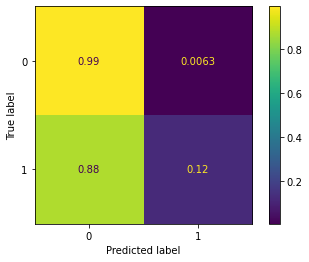

In [45]:
print('Train Metrics')
print(classification_report(y_train, y_train_pred))
print('-'*100)
plot_confusion_matrix(best_model, X_train_full, y_train, normalize= 'true');

Test Metrics
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10056
           1       0.84      0.14      0.24      1706

    accuracy                           0.87     11762
   macro avg       0.86      0.57      0.58     11762
weighted avg       0.87      0.87      0.83     11762

----------------------------------------------------------------------------------------------------


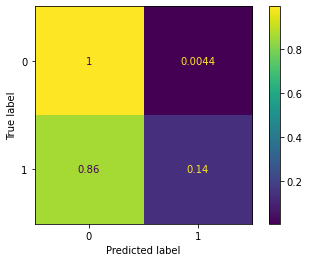

In [46]:
print('Test Metrics')
print(classification_report(y_test, y_test_pred))
print('-'*100)
plot_confusion_matrix(best_model, X_test_full, y_test, normalize= 'true');

Model precision was improved in the minority class, however the model performed much poorly in the prediction of the minority class compared to the base logistic regression model, with the tuned model able to correctly predict only 14% of the minority class. The model is able to catch 99% of the majority class. The model is unsatisfying therefore we try another model. The MAE of the training and test set is about the same.

#### 2) KNN Models

In [47]:
# instantiating the model
knn = KNeighborsClassifier()

In [48]:
# fitting the model, generate predictions, checking accuracy score
knn.fit(X_train_full, y_train)
y_train_preds = knn.predict(X_train_full)
y_test_preds = knn.predict(X_test_full)

In [49]:
print('The Mean absolute error on the train set is', round(mean_absolute_error(y_train, y_train_preds), 4))
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_test, y_test_preds), 4))

The Mean absolute error on the train set is 0.0972
The Mean absolute error on the test set is 0.1266


Train Metrics
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10156
           1       0.75      0.43      0.55      1606

    accuracy                           0.90     11762
   macro avg       0.83      0.70      0.75     11762
weighted avg       0.89      0.90      0.89     11762

----------------------------------------------------------------------------------------------------


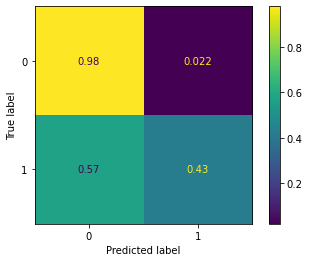

In [50]:
print('Train Metrics')
print(classification_report(y_train, y_train_preds))
print('-'*100)
plot_confusion_matrix(knn, X_train_full, y_train, normalize= 'true');

Test Metrics
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     10056
           1       0.62      0.34      0.44      1706

    accuracy                           0.87     11762
   macro avg       0.76      0.65      0.68     11762
weighted avg       0.86      0.87      0.86     11762

----------------------------------------------------------------------------------------------------


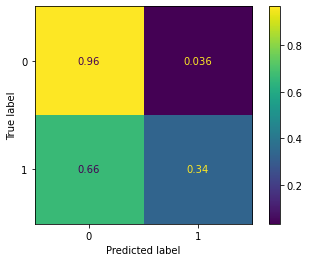

In [51]:
print('Test Metrics')
print(classification_report(y_test, y_test_preds))
print('-'*100)
plot_confusion_matrix(knn, X_test_full, y_test, normalize= 'true');

The base KNN model performs just about the same as the Logistic regression base model. The model is able to predict about 34% of the minority class. With a slight drop of 3% to 96% from the Logistic regression model in the majority class. Tuning the model model might help to improve precision on the minority class. The MAE has increased from the base Logistic regression model with about .01.

In [88]:
# https://towardsdatascience.com/regularization-in-deep-learning-l1-l2-and-dropout-377e75acc036
# https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390
# https://towardsdatascience.com/combine-two-string-columns-pandas-fde0287485d9
# https://learn.microsoft.com/en-us/training/challenges?id=e1b3cb45-d3ae-48e9-9271-b2fa82334c25
# https://learn.microsoft.com/en-us/users/cloudskillschallenge/collections/gm3rbnwzx1p?WT.mc_id=cloudskillschallenge_0a4dbaeb-819a-4ab2-91c4-33610096adc9
# https://towardsdatascience.com/two-is-better-than-one-ensembling-models-611ee4fa9bd8

In [52]:
params = {'n_neighbors': [x for x in range(5, 11)], 'weights': ['uniform', 'distance'],
          'algorithm': ['ball_tree', 'kd_tree', 'brute']}
grid_search = GridSearchCV(knn, param_grid= params, scoring= 'precision')
grid_search.fit(X_train_full, y_train)
grid_search.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=6)

In [53]:
best_knn = KNeighborsClassifier(algorithm= 'kd_tree', n_neighbors= 6)
best_knn.fit(X_train_full, y_train)
y_train_preds = best_knn.predict(X_train_full)
y_test_preds = best_knn.predict(X_test_full)

In [54]:
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_train, y_train_preds), 4))
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_test, y_test_preds), 4))

The Mean absolute error on the test set is 0.1039
The Mean absolute error on the test set is 0.1206


Train Metrics
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10156
           1       0.80      0.32      0.45      1606

    accuracy                           0.90     11762
   macro avg       0.85      0.65      0.70     11762
weighted avg       0.89      0.90      0.88     11762

----------------------------------------------------------------------------------------------------


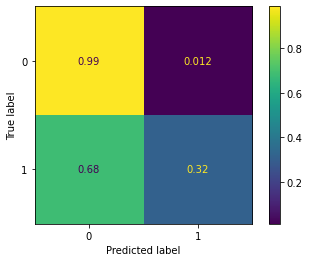

In [55]:
print('Train Metrics')
print(classification_report(y_train, y_train_preds))
print('-'*100)
plot_confusion_matrix(best_knn, X_train_full, y_train, normalize= 'true');

Test Metrics
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     10056
           1       0.72      0.27      0.40      1706

    accuracy                           0.88     11762
   macro avg       0.81      0.63      0.66     11762
weighted avg       0.86      0.88      0.86     11762

----------------------------------------------------------------------------------------------------


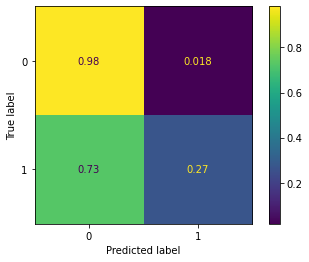

In [56]:
print('Test Metrics')
print(classification_report(y_test, y_test_preds))
print('-'*100)
plot_confusion_matrix(best_knn, X_test_full, y_test, normalize= 'true');

The KNN model is not performing that well even with tuning. Most of the models have been biased towards the majority class. Going forward, looking to improve model performance on the minority class would be a key objective. With Significant model differentiation of the two classes. The tuned model can only identify 27% of the minority class correctly.

#### 3) Decision tree

In [57]:
# instantiate the DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion= 'entropy')

In [59]:
# fitting the model
dtc.fit(X_train_full, y_train)
# predicting on train and test
y_train_preds = dtc.predict(X_train_full)
y_test_preds = dtc.predict(X_test_full)

In [94]:
# fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= (8, 5), dpi= 300)
# tree.plot_tree(dtc,
#           feature_names= X_train_full.columns,
#           class_names= np.unique(y).astype('str'),
#           filled= True)
# plt.show()

In [60]:
# printing accuracy scores
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_train, y_train_preds), 4))
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_test, y_test_preds), 4))

The Mean absolute error on the test set is 0.0257
The Mean absolute error on the test set is 0.1555


Train Metrics
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     10156
           1       0.99      0.82      0.90      1606

    accuracy                           0.97     11762
   macro avg       0.98      0.91      0.94     11762
weighted avg       0.97      0.97      0.97     11762

----------------------------------------------------------------------------------------------------


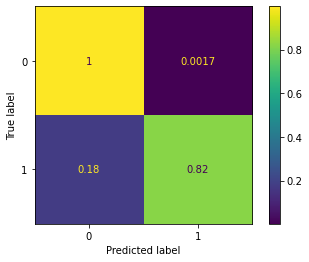

In [61]:
print('Train Metrics')
print(classification_report(y_train, y_train_preds))
print('-'*100)
plot_confusion_matrix(dtc, X_train_full, y_train, normalize= 'true');

Test Metrics
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     10056
           1       0.46      0.39      0.42      1706

    accuracy                           0.84     11762
   macro avg       0.68      0.65      0.66     11762
weighted avg       0.83      0.84      0.84     11762

----------------------------------------------------------------------------------------------------


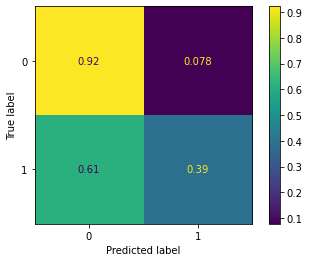

In [62]:
print('Test Metrics')
print(classification_report(y_test, y_test_preds))
print('-'*100)
plot_confusion_matrix(dtc, X_test_full, y_test, normalize= 'true');

The model was promising in the training set but the performance on the test set was bad which suggest the model is overfitting on the train set. The model was able to identify the 39% of the minority class correctly, while identifying 92% of the the majority class. The MAE increased by .04 from the KNN model. Tuning the model might help.

In [63]:
# tuning
params = {'criterion': ['gini', 'entropy'], 'min_samples_split': [x for x in range(2, 11)], 
          'max_depth': [x for x in range(2, 11)], 'min_samples_leaf': [x for x in range(2, 5)], 
          'max_leaf_nodes': [x for x in range(2, 11)]}
# params = {'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(dtc, param_grid= params, scoring= 'precision')
grid_search.fit(X_train_full, y_train)
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, min_samples_leaf=2)

In [64]:
# fitting best model
best_dtc = DecisionTreeClassifier(max_depth= 3, max_leaf_nodes= 8, min_samples_leaf=2)
best_dtc.fit(X_train_full, y_train)
# predict
y_train_preds = best_dtc.predict(X_train_full)
y_test_preds = best_dtc.predict(X_test_full)
# printing mae scores
print('The Mean absolute error on the train set is', round(mean_absolute_error(y_train, y_train_preds), 4))
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_test, y_test_preds), 4))

The Mean absolute error on the train set is 0.1179
The Mean absolute error on the test set is 0.1216


Train Metrics
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     10156
           1       0.73      0.22      0.33      1606

    accuracy                           0.88     11762
   macro avg       0.81      0.60      0.63     11762
weighted avg       0.87      0.88      0.85     11762

----------------------------------------------------------------------------------------------------


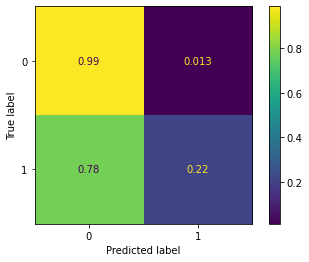

In [65]:
print('Train Metrics')
print(classification_report(y_train, y_train_preds))
print('-'*100)
plot_confusion_matrix(best_dtc, X_train_full, y_train, normalize= 'true');

Test Metrics
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     10056
           1       0.77      0.23      0.36      1706

    accuracy                           0.88     11762
   macro avg       0.83      0.61      0.64     11762
weighted avg       0.87      0.88      0.85     11762

----------------------------------------------------------------------------------------------------


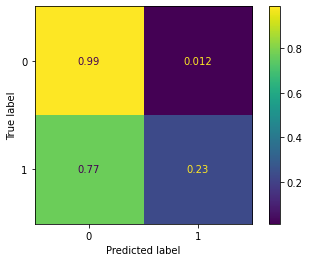

In [66]:
print('Test Metrics')
print(classification_report(y_test, y_test_preds))
print('-'*100)
plot_confusion_matrix(best_dtc, X_test_full, y_test, normalize= 'true');

Tuning the model has made its performance on the training and the test set has made it worse. The tuned model is able to predict 23% in the minority class while predicting 99% in the majority class. The MAE of the model both on the train and test set is relatively the same.

#### 4) Xgboost classifier

In [67]:
# instantiate classifier
xgb_classifier = xgb.XGBClassifier()
# fitting
xgb_classifier.fit(X_train_full, y_train)
# predicting on train and test set
y_train_preds = xgb_classifier.predict(X_train_full)
y_test_preds = xgb_classifier.predict(X_test_full)

In [68]:
# printing mae score
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_train, y_train_preds), 4))
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_test, y_test_preds), 4))

The Mean absolute error on the test set is 0.0779
The Mean absolute error on the test set is 0.12


Train Metrics
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10156
           1       0.85      0.52      0.65      1606

    accuracy                           0.92     11762
   macro avg       0.89      0.75      0.80     11762
weighted avg       0.92      0.92      0.91     11762

----------------------------------------------------------------------------------------------------


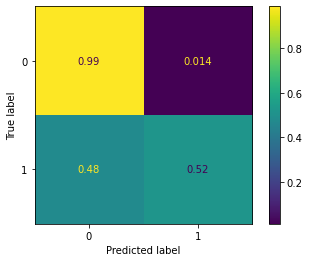

In [69]:
print('Train Metrics')
print(classification_report(y_train, y_train_preds))
print('-'*100)
plot_confusion_matrix(xgb_classifier, X_train_full, y_train, normalize= 'true');

Test Metrics
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     10056
           1       0.65      0.37      0.47      1706

    accuracy                           0.88     11762
   macro avg       0.78      0.67      0.70     11762
weighted avg       0.86      0.88      0.87     11762

----------------------------------------------------------------------------------------------------


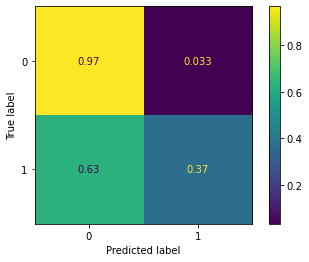

In [70]:
print('Test Metrics')
print(classification_report(y_test, y_test_preds))
print('-'*100)
plot_confusion_matrix(xgb_classifier, X_test_full, y_test, normalize= 'true');

The Xgboost Classifier performed fairly on predicting the minority class, catching about 55% of the minority class in the train set. However, performance dropped significantly on the test set with the model predicting about 37% of the minority class in the test set.

In [101]:
# params = {'learning_rate': list(np.linspace(.01, .25, num= 5)),
#           'max_depth': [x for x in range(1, 6)],
#           'subsample': list(np.linspace(.5, .9, num= 5)),
#           'colsample_bytree': list(np.linspace(.5, .9, num= 5))}
# grid_search = GridSearchCV(xgb_classifier, param_grid= params)
# grid_search.fit(X_train_full, y_train)
# grid_search.best_estimator_

Grid Search was taking longer than expected. Tuning the xgboost model could be revisited later. With the initial model having a MAE of about 0.1187 with precision of about 96%(majority class) and 37%(Minority class).

#### 5) Random Forest

In [71]:
# instantiate
rfc = RandomForestClassifier()
# fitting
rfc.fit(X_train_full, y_train)
# predicting on train and test
y_train_preds = rfc.predict(X_train_full)
y_test_preds = rfc.predict(X_test_full)

In [72]:
# printing mae score
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_train, y_train_preds), 4))
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_test, y_test_preds), 4))

The Mean absolute error on the test set is 0.0257
The Mean absolute error on the test set is 0.1388


Train Metrics
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10156
           1       0.95      0.85      0.90      1606

    accuracy                           0.97     11762
   macro avg       0.96      0.92      0.94     11762
weighted avg       0.97      0.97      0.97     11762

----------------------------------------------------------------------------------------------------


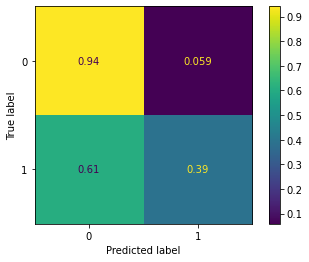

In [73]:
print('Train Metrics')
print(classification_report(y_train, y_train_preds))
print('-'*100)
plot_confusion_matrix(rfc, X_test_full, y_test, normalize= 'true');

Test Metrics
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     10056
           1       0.53      0.39      0.45      1706

    accuracy                           0.86     11762
   macro avg       0.72      0.67      0.68     11762
weighted avg       0.85      0.86      0.85     11762

----------------------------------------------------------------------------------------------------


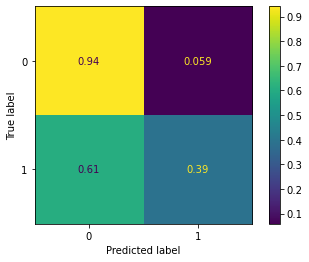

In [74]:
print('Test Metrics')
print(classification_report(y_test, y_test_preds))
print('-'*100)
plot_confusion_matrix(rfc, X_test_full, y_test, normalize= 'true');

Just as the previous models, the results are a little underwhelming. The model is able to predict about 39% of the minority class and 94% of the majority class. The next logical step is to tune the model and see if these values can be improved, especially in the minority class.

In [75]:
# tuning the rfc
params = {'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [x for x in range(5, 11)],
          'min_samples_split': list(np.linspace(.1, 1, 5)),
          'max_features': ['sqrt', 'log2', None]}
grid_search = GridSearchCV(rfc, param_grid= params, scoring= 'precision')
grid_search.fit(X_train_full, y_train)
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=0.1)

In [76]:
# fitting best model
best_rfc = RandomForestClassifier(criterion= 'entropy',
                                  max_depth= 10, max_features= 'log2',
                                  min_samples_split= 0.1)
best_rfc.fit(X_train_full, y_train)
# predict
y_train_preds = best_rfc.predict(X_train_full)
y_test_preds = best_rfc.predict(X_test_full)
# printing mae scores
print('The Mean absolute error on the train set is', round(mean_absolute_error(y_train, y_train_preds), 4))
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_test, y_test_preds), 4))

The Mean absolute error on the train set is 0.1334
The Mean absolute error on the test set is 0.1402


Train Metrics
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10156
           1       0.86      0.03      0.05      1606

    accuracy                           0.87     11762
   macro avg       0.86      0.51      0.49     11762
weighted avg       0.87      0.87      0.81     11762

----------------------------------------------------------------------------------------------------


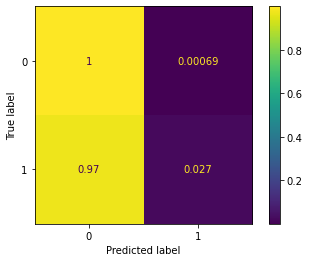

In [77]:
print('Train Metrics')
print(classification_report(y_train, y_train_preds))
print('-'*100)
plot_confusion_matrix(best_rfc, X_train_full, y_train, normalize= 'true');

Test Metrics
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10056
           1       0.94      0.04      0.07      1706

    accuracy                           0.86     11762
   macro avg       0.90      0.52      0.50     11762
weighted avg       0.87      0.86      0.80     11762

----------------------------------------------------------------------------------------------------


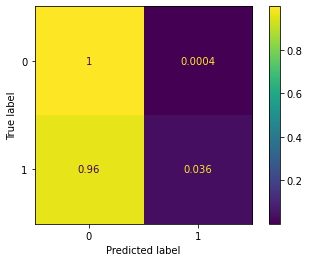

In [78]:
print('Test Metrics')
print(classification_report(y_test, y_test_preds))
print('-'*100)
plot_confusion_matrix(best_rfc, X_test_full, y_test, normalize= 'true');

The model is extreemly biased towards the majority class. It goes withought saying that this is not an appropriate model for this dataset. All models above have an impressive accuracy with the lowest recorded accuracy being 84%.

### Addressing Class Imbalance

In [ ]:
# https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

#### 1. SMOTE

Trying to resample the classes above to see if the model precision on the minority class can be improved further.

In [79]:
smote = imblearn.over_sampling.SMOTE()

In [80]:
# checking class distribution
y_train.value_counts()

0    10156
1     1606
Name: bank_account, dtype: int64

In [81]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train)
print('X train resampled shape is', X_train_resampled.shape)
print('-'*100)
print('y train value counts are\n', y_train_resampled.value_counts())

X train resampled shape is (20312, 40)
----------------------------------------------------------------------------------------------------
y train value counts are
 0    10156
1    10156
Name: bank_account, dtype: int64


In [82]:
def metrics(model, X, y, y_pred):
    print(classification_report(y, y_pred))
    print('-'*100)
    plot_confusion_matrix(model, X, y, normalize= 'true');

In [83]:
def model(model, X_train, y_train, X_test, y_test, param):
    """This function takes in a model, x and y variables then 
    fits the model on the variables, optimizes through grid search
    then returns the model accuracy on the test data."""
    
    grid_search = GridSearchCV(model, param_grid= param, scoring= 'precision')
    grid_search.fit(X_train, y_train)
    model = grid_search.best_estimator_
    model.fit(X_test, y_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('The best model is', model)
    print('-'*100)
    print('Train Metrics')
    print('Train MAE', round(mean_absolute_error(y_train, y_train_pred), 4))
    print('-'*100)
    metrics(model, X_train, y_train, y_train_pred)
    print('Test Metrics')
    print('Test MAE', round(mean_absolute_error(y_test, y_test_pred), 4))
    metrics(model, X_test, y_test, y_test_pred)

##### a) Logistic Model with SMOTE

The best model is LogisticRegression(C=21.54434690031882, fit_intercept=False, solver='liblinear')
----------------------------------------------------------------------------------------------------
Train Metrics
Train MAE 0.3559
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.97      0.73     10156
           1       0.92      0.31      0.47     10156

    accuracy                           0.64     20312
   macro avg       0.75      0.64      0.60     20312
weighted avg       0.75      0.64      0.60     20312

----------------------------------------------------------------------------------------------------
Test Metrics
Test MAE 0.1152
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     10056
           1       0.70      0.36      0.48      1706

    accuracy                           0.88    

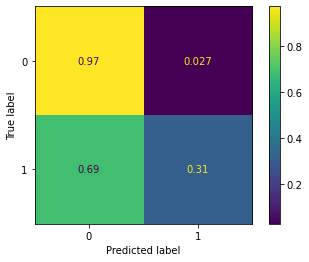

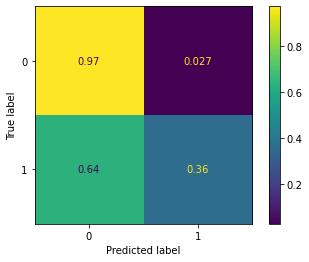

In [84]:
log_model = LogisticRegression(fit_intercept= False, solver= 'liblinear')
param = {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 10)}
model(log_model, X_train_resampled, y_train_resampled, X_test_full, y_test, param)

Even with oversampling, there isn't a significant improvement in model performance. The Logistic Regression model is still heavily biased towards the majority class, with the model being able to precisely predict 97% of the class. The model is able to correctly predict 36% of the minority class. With MAE on the test set being 0.1146.

##### b) KNN Model with SMOTE

The best model is KNeighborsClassifier(algorithm='ball_tree', weights='distance')
----------------------------------------------------------------------------------------------------
Train Metrics
Train MAE 0.3428
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.93      0.73     10156
           1       0.85      0.38      0.53     10156

    accuracy                           0.66     20312
   macro avg       0.73      0.66      0.63     20312
weighted avg       0.73      0.66      0.63     20312

----------------------------------------------------------------------------------------------------
Test Metrics
Test MAE 0.0241
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     10056
           1       0.99      0.84      0.91      1706

    accuracy                           0.98     11762
   macro a

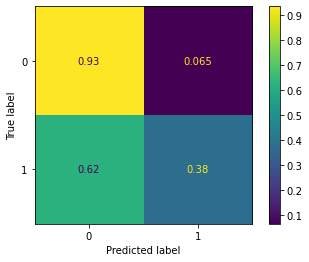

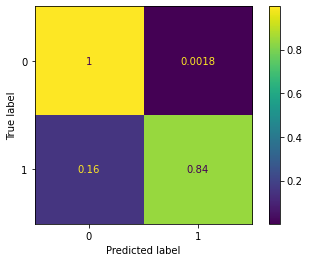

In [85]:
knn = KNeighborsClassifier()
params = {'n_neighbors': [x for x in range(5, 11)], 'weights': ['uniform', 'distance'],
          'algorithm': ['ball_tree', 'kd_tree', 'brute']}
model(knn, X_train_resampled, y_train_resampled, X_test_full, y_test, params)

This is the most promising model so far, it had fairly poor performance on the minority class on the train set, however it surprisingly performed really well in the test set with the model catching about 84% of the minority class while simultaneously prediction around 100% of the majority class. The model was run a few times with different splits of the train and test set splits, the results were just about the same. The MAE was 0.0241 which is the lowest that has been recorded so far.

##### c) Decision Tree with SMOTE

The best model is DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=2)
----------------------------------------------------------------------------------------------------
Train Metrics
Train MAE 0.3844
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.97      0.72     10156
           1       0.90      0.26      0.40     10156

    accuracy                           0.62     20312
   macro avg       0.73      0.62      0.56     20312
weighted avg       0.73      0.62      0.56     20312

----------------------------------------------------------------------------------------------------
Test Metrics
Test MAE 0.1298
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10056
           1       0.62      0.26      0.37      1706

    accuracy                           0.87     11762


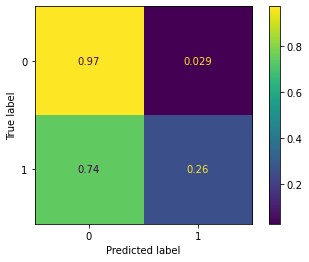

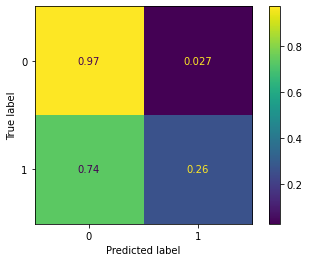

In [86]:
dtc = DecisionTreeClassifier(criterion= 'entropy')
params = {'criterion': ['gini', 'entropy'], 'min_samples_split': [x for x in range(2, 11)], 
          'max_depth': [x for x in range(2, 11)], 'min_samples_leaf': [x for x in range(2, 5)], 
          'max_leaf_nodes': [x for x in range(2, 11)]}
model(dtc, X_train_resampled, y_train_resampled, X_test_full, y_test, params)

The Decision Tree model is still underwhelming with poor performance on the test set with the model biased on the majority class. The model can only correctly predict 26% of the minority class, while it is able to predict 97% of the majority class. The test MAE is 0.1274.

##### d) Xgboost with SMOTE
Tuning this model on the machine takes longer than anticipated, therefore default parameters will be used on the resampled train data.

In [87]:
# instantiate classifier
xgb_classifier = xgb.XGBClassifier()
# fitting
xgb_classifier.fit(X_train_resampled, y_train_resampled)
# predicting on train and test set
y_train_preds = xgb_classifier.predict(X_train_resampled)
y_test_preds = xgb_classifier.predict(X_test_full)

In [88]:
# printing accuracy scores
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_train_resampled, y_train_preds), 4))
print('-'*100)
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_test, y_test_preds), 4))

The Mean absolute error on the test set is 0.0545
----------------------------------------------------------------------------------------------------
The Mean absolute error on the test set is 0.1246


Train Metrics
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10156
           1       0.97      0.92      0.94     10156

    accuracy                           0.95     20312
   macro avg       0.95      0.95      0.95     20312
weighted avg       0.95      0.95      0.95     20312

----------------------------------------------------------------------------------------------------


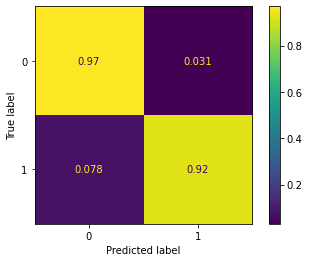

In [89]:
print('Train Metrics')
print(classification_report(y_train_resampled, y_train_preds))
print('-'*100)
plot_confusion_matrix(xgb_classifier, X_train_resampled, y_train_resampled, normalize= 'true');

Test Metrics
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     10056
           1       0.60      0.41      0.49      1706

    accuracy                           0.88     11762
   macro avg       0.75      0.68      0.71     11762
weighted avg       0.86      0.88      0.87     11762

----------------------------------------------------------------------------------------------------


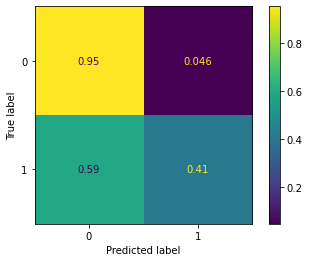

In [90]:
print('Test Metrics')
print(classification_report(y_test, y_test_preds))
print('-'*100)
plot_confusion_matrix(xgb_classifier, X_test_full, y_test, normalize= 'true');

This model is so far the second best model that has been obtained. The model is able to correctly predict about 41% of the minority class, and 94% of the majority class. The MAE of the model is 0.1291.

##### e) Random Forest With SMOTE

The best model is RandomForestClassifier(criterion='entropy', max_depth=7, max_features=None,
                       min_samples_split=0.1)
----------------------------------------------------------------------------------------------------
Train Metrics
Train MAE 0.3967
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.99      0.71     10156
           1       0.95      0.22      0.35     10156

    accuracy                           0.60     20312
   macro avg       0.76      0.60      0.53     20312
weighted avg       0.76      0.60      0.53     20312

----------------------------------------------------------------------------------------------------
Test Metrics
Test MAE 0.119
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     10056
           1       0.80      0.24      0.37      1706

    acc

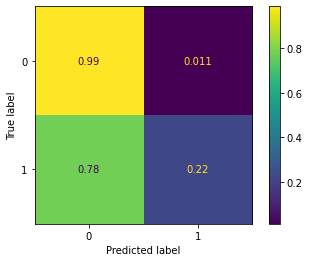

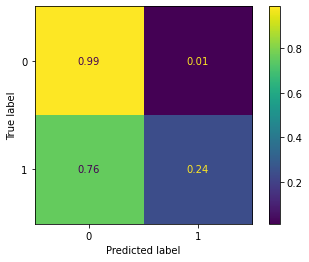

In [91]:
rfc = RandomForestClassifier()
params = {'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [x for x in range(5, 11)],
          'min_samples_split': list(np.linspace(.1, 1, 5)),
          'max_features': ['sqrt', 'log2', None]}
model(rfc, X_train_resampled, y_train_resampled, X_test_full, y_test, params)

The model is significantly biased towards the majority class as it incorrectly identifies about 96% of the minority class.

Through Sythentic Minority Oversampling Technique (SMOTE), precision on the minority class was improved significantly in some of the models compared to previous models. However, some of the results still leave a lot to be desired. Accuracy has been impressive in all the models, given that, it is not wise to rely on it as a metric for model performance.

The best model so far has been the KNN model which was fitted on the SMOTE samples.

#### 2. Undersampling

In [92]:
rus = RandomUnderSampler(random_state= 42, replacement= True)
X_train_rus, y_train_rus = rus.fit_resample(X_train_full, y_train)
print('Undersample X train', X_train_rus.shape)
print('Undersample y train', y_train_rus.shape)

Undersample X train (3212, 40)
Undersample y train (3212,)


##### a) Logistic Model With Undersampling

The best model is LogisticRegression(C=0.3593813663804626, fit_intercept=False, penalty='l1',
                   solver='liblinear')
----------------------------------------------------------------------------------------------------
Train Metrics
Train MAE 0.3562
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.97      0.73      1606
           1       0.92      0.32      0.47      1606

    accuracy                           0.64      3212
   macro avg       0.75      0.64      0.60      3212
weighted avg       0.75      0.64      0.60      3212

----------------------------------------------------------------------------------------------------
Test Metrics
Test MAE 0.1157
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     10056
           1       0.70      0.36      0.47      1706

    accuracy 

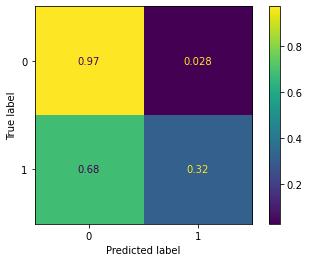

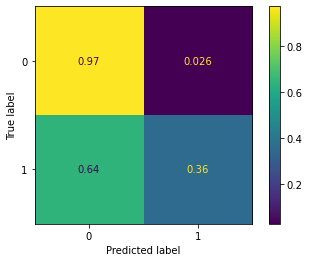

In [93]:
log_model = LogisticRegression(fit_intercept= False, solver= 'liblinear')
param = {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 10)}
model(log_model, X_train_rus, y_train_rus, X_test_full, y_test, param)

##### b) KNN With Undersampling

The best model is KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6)
----------------------------------------------------------------------------------------------------
Train Metrics
Train MAE 0.3699
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.98      0.73      1606
           1       0.93      0.28      0.43      1606

    accuracy                           0.63      3212
   macro avg       0.75      0.63      0.58      3212
weighted avg       0.75      0.63      0.58      3212

----------------------------------------------------------------------------------------------------
Test Metrics
Test MAE 0.1042
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10056
           1       0.81      0.37      0.50      1706

    accuracy                           0.90     11762
   macro avg   

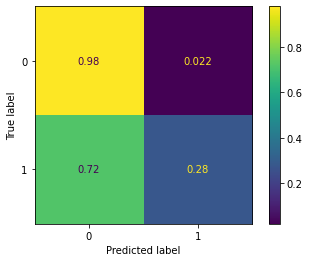

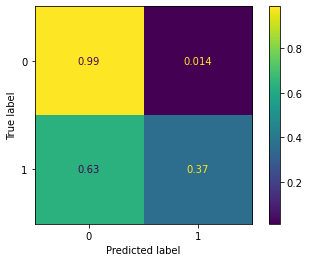

In [94]:
knn = KNeighborsClassifier()
params = {'n_neighbors': [x for x in range(5, 11)], 'weights': ['uniform', 'distance'],
          'algorithm': ['ball_tree', 'kd_tree', 'brute']}
model(knn, X_train_rus, y_train_rus, X_test_full, y_test, params)

##### c) Decision Tree With Undersampling

The best model is DecisionTreeClassifier(max_depth=6, max_leaf_nodes=9, min_samples_leaf=2)
----------------------------------------------------------------------------------------------------
Train Metrics
Train MAE 0.3652
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.97      0.73      1606
           1       0.92      0.30      0.45      1606

    accuracy                           0.63      3212
   macro avg       0.75      0.63      0.59      3212
weighted avg       0.75      0.63      0.59      3212

----------------------------------------------------------------------------------------------------
Test Metrics
Test MAE 0.1191
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     10056
           1       0.69      0.33      0.44      1706

    accuracy                           0.88     11762


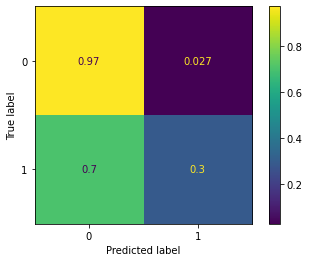

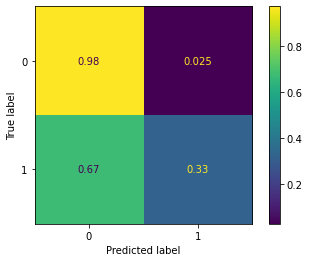

In [95]:
dtc = DecisionTreeClassifier(criterion= 'entropy')
params = {'criterion': ['gini', 'entropy'], 'min_samples_split': [x for x in range(2, 11)], 
          'max_depth': [x for x in range(2, 11)], 'min_samples_leaf': [x for x in range(2, 5)], 
          'max_leaf_nodes': [x for x in range(2, 11)]}
model(dtc, X_train_rus, y_train_rus, X_test_full, y_test, params)

##### d) Xgboost With Undersampling

In [96]:
# instantiate classifier
xgb_classifier = xgb.XGBClassifier()
# fitting
xgb_classifier.fit(X_train_rus, y_train_rus)
# predicting on train and test set
y_train_preds = xgb_classifier.predict(X_train_rus)
y_test_preds = xgb_classifier.predict(X_test_full)

In [97]:
# printing mae scores
print('The Mean absolute error on the train set is', round(mean_absolute_error(y_train_rus, y_train_preds), 4))
print('-'*100)
print('The Mean absolute error on the test set is', round(mean_absolute_error(y_test, y_test_preds), 4))

The Mean absolute error on the train set is 0.0956
----------------------------------------------------------------------------------------------------
The Mean absolute error on the test set is 0.2522


Train Metrics
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1606
           1       0.90      0.91      0.90      1606

    accuracy                           0.90      3212
   macro avg       0.90      0.90      0.90      3212
weighted avg       0.90      0.90      0.90      3212

----------------------------------------------------------------------------------------------------


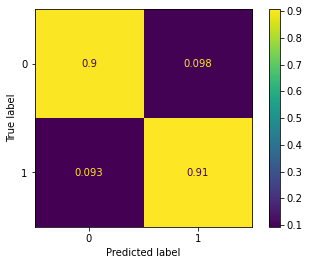

In [98]:
print('Train Metrics')
print(classification_report(y_train_rus, y_train_preds))
print('-'*100)
plot_confusion_matrix(xgb_classifier, X_train_rus, y_train_rus, normalize= 'true');

Test Metrics
              precision    recall  f1-score   support

           0       0.94      0.75      0.84     10056
           1       0.33      0.74      0.46      1706

    accuracy                           0.75     11762
   macro avg       0.64      0.74      0.65     11762
weighted avg       0.86      0.75      0.78     11762

----------------------------------------------------------------------------------------------------


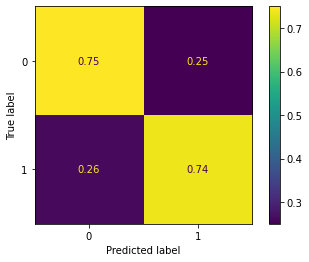

In [99]:
print('Test Metrics')
print(classification_report(y_test, y_test_preds))
print('-'*100)
plot_confusion_matrix(xgb_classifier, X_test_full, y_test, normalize= 'true');

##### e) Random Forest and Undersampling

The best model is RandomForestClassifier(max_depth=8, max_features=None, min_samples_split=0.1)
----------------------------------------------------------------------------------------------------
Train Metrics
Train MAE 0.4026
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.99      0.71      1673
           1       0.96      0.20      0.34      1673

    accuracy                           0.60      3346
   macro avg       0.76      0.60      0.52      3346
weighted avg       0.76      0.60      0.52      3346

----------------------------------------------------------------------------------------------------
Test Metrics
Test MAE 0.1209
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     10046
           1       0.77      0.18      0.30      1616

    accuracy                           0.88     11

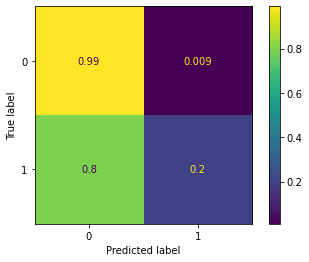

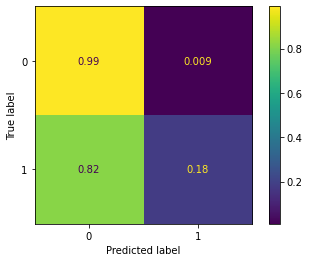

In [87]:
rfc = RandomForestClassifier()
params = {'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [x for x in range(5, 11)],
          'min_samples_split': list(np.linspace(.1, 1, 5)),
          'max_features': ['sqrt', 'log2', None]}
model(rfc, X_train_rus, y_train_rus, X_test_full, y_test, params)

##### Observations

So far model performance in undersampling have been fairly poor. The best model was the Xgboost model(Untuned) which correctly predicted about 74% of the minority class and about the same percentage of the majority class, 76%.

### Final Model

The best model has been the KNN model which was fitted on the SMOTE data samples. The model will be fitted on the SMOTE samples below and then used to make final predictions on the final test dataset.

In [100]:
# final model
final_model = KNeighborsClassifier(algorithm= 'ball_tree', weights= 'distance')
final_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(algorithm='ball_tree', weights='distance')

In [101]:
# pickling the model
# pickle.dump(final_model, open('final_model.pkl', 'wb'))
# final_model = pickle.load(open('final_model.pkl', 'rb'))

### Final predictions

In [102]:
# preprocessing final test set
test_ohe = cat_list(test_copy, categorical)
test_ohe.head()

,age_of_respondent,Kenya,Rwanda,Tanzania,Uganda,Rural,Urban,No,Yes,Female,...,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed,size 3 or below,size above 10,size btw 4 and 6,size btw 7 and 10
0,30,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,51,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,77,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,39,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,16,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [103]:
# scaling the age_of_respondent column on test set
test_numeric = test_copy[['age_of_respondent']].copy()
# fitting and transforming
test_num_scaled = scaler.transform(test_numeric)
#changing to dataframe
test_num_scaled = pd.DataFrame(test_num_scaled,
                                  index= test_numeric.index,
                                  columns= test_numeric.columns)
test_final = pd.concat([test_ohe.drop('age_of_respondent', axis= 1), test_num_scaled], axis= 1)

In [104]:
test_final.head()

,Kenya,Rwanda,Tanzania,Uganda,Rural,Urban,No,Yes,Female,Male,...,Informally employed,No Income,Other Income,Remittance Dependent,Self employed,size 3 or below,size above 10,size btw 4 and 6,size btw 7 and 10,age_of_respondent
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.166667
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.416667
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.726190
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.273810
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000


In [105]:
# making final predictions
test_preds = final_model.predict(test_final)

In [106]:
test_preds

array([1, 1, 0, ..., 1, 0, 1])

In [111]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account,unique_id
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,1,uniqueid_6056 x Kenya
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,1,uniqueid_6060 x Kenya
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,0,uniqueid_6065 x Kenya
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,0,uniqueid_6072 x Kenya
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,0,uniqueid_6073 x Kenya


In [110]:
test['bank_account'] = list(test_preds)
test['unique_id'] = test['uniqueid'].str.cat(test['country'], sep= ' x ')
submission_file = test[['unique_id', 'bank_account']].copy()
# submission_file.to_csv('data/submission_file.csv', index= False)

## Conclusions

The best model so far is the KNeighborsClassifier. Overall there is lack of access to bank accounts among the population in the region. There maybe multiple factors to these eg.
1. Lack of trust on banking institutions.
2. Emergence of mobile banking across the region.
3. Lack of education to the population about banking institutions.

Further investment in these department will go along way in trying to enable the population save more and increase faith in banking services.

## Recommendations

These are the recommendations from this analysis:
1. Increase microfinance initiatives to boost knowledge of financial institutions.
2. Active Campaigns should be carried out to target people in informal employment to increase their access to bank accounts.
3. Further research should be carried out to find out why most household heads have no access to bank accounts.